# Menyimpan model Scikit Learn

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# membaca dataset
dataset = pd.read_csv('drive/My Drive/Datasets/iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# membagi dataset features dan label
features = dataset.drop(['Id', 'Species'], axis=1)
label = dataset['Species']

In [7]:
col = features.columns
col

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [8]:
# bagi dta training dan data testing
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.15, random_state=10)

# Melatih dan Evaluasi Model

In [9]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('scaler', PowerTransformer(method='yeo-johnson')), ('model', LogisticRegression())])
pipeline.fit(feature_train, label_train)

Pipeline(memory=None,
         steps=[('scaler',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [10]:
# memprediksi data test
test_pred = pipeline.predict(feature_test)

In [11]:
# evaluasi model
from sklearn.metrics import classification_report
print(classification_report(label_test, test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        23
      macro avg       1.00      1.00      1.00        23
   weighted avg       1.00      1.00      1.00        23



# Menyimpan Model Hasil Training

In [12]:
import pickle

In [13]:
nama_file = 'model.pkl'
pickle.dump(pipeline, open(nama_file, 'wb'))

# Loading Model Hasil Training

In [14]:
load_model = pickle.load(open(nama_file, 'rb'))

In [15]:
label_pred_loaded = load_model.predict(feature_test)

In [16]:
# evaluasi model
from sklearn.metrics import classification_report
print(classification_report(label_test, label_pred_loaded))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        23
      macro avg       1.00      1.00      1.00        23
   weighted avg       1.00      1.00      1.00        23



In [51]:
# menampilkan feature data test yang akan diprediksi
feature_test_df = pd.DataFrame(feature_test, columns=col)
feature_test_df.reset_index(drop=['index'], inplace=True)
feature_test_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.3,2.3,4.4,1.3
1,6.4,2.7,5.3,1.9
2,5.4,3.7,1.5,0.2
3,6.1,3.0,4.6,1.4
4,5.0,3.3,1.4,0.2
5,5.0,2.0,3.5,1.0
6,6.3,2.5,4.9,1.5
7,5.8,2.7,4.1,1.0
8,5.1,3.4,1.5,0.2
9,5.7,2.8,4.5,1.3


In [20]:
feature_test_df.shape

(23, 4)

# Contoh Prediksi

In [18]:
# memprediksi label dari masing-masing data feture_test
test_data = feature_test_df.values

hasil_pred = []

for i in range(len(test_data)):
  pred_example = load_model.predict(test_data[[i]])
  hasil_pred.append(pred_example)
  print('{}. hasil prediksi: {}'.format(i, pred_example))

0. hasil prediksi: ['Iris-versicolor']
1. hasil prediksi: ['Iris-virginica']
2. hasil prediksi: ['Iris-setosa']
3. hasil prediksi: ['Iris-versicolor']
4. hasil prediksi: ['Iris-setosa']
5. hasil prediksi: ['Iris-versicolor']
6. hasil prediksi: ['Iris-versicolor']
7. hasil prediksi: ['Iris-versicolor']
8. hasil prediksi: ['Iris-setosa']
9. hasil prediksi: ['Iris-versicolor']
10. hasil prediksi: ['Iris-versicolor']
11. hasil prediksi: ['Iris-virginica']
12. hasil prediksi: ['Iris-versicolor']
13. hasil prediksi: ['Iris-setosa']
14. hasil prediksi: ['Iris-setosa']
15. hasil prediksi: ['Iris-virginica']
16. hasil prediksi: ['Iris-versicolor']
17. hasil prediksi: ['Iris-setosa']
18. hasil prediksi: ['Iris-setosa']
19. hasil prediksi: ['Iris-setosa']
20. hasil prediksi: ['Iris-virginica']
21. hasil prediksi: ['Iris-virginica']
22. hasil prediksi: ['Iris-virginica']


In [52]:
# membuat hasil prediksi dalam bentuk dataframe
prediksi_df = pd.DataFrame(hasil_pred, columns=['Hasil Prediksi'])

# menggabungkan dataframe feature test dan hasil prediksinya
result = pd.concat([feature_test_df, prediksi_df], axis=1, sort=False)
result

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Hasil Prediksi
0,6.3,2.3,4.4,1.3,Iris-versicolor
1,6.4,2.7,5.3,1.9,Iris-virginica
2,5.4,3.7,1.5,0.2,Iris-setosa
3,6.1,3.0,4.6,1.4,Iris-versicolor
4,5.0,3.3,1.4,0.2,Iris-setosa
5,5.0,2.0,3.5,1.0,Iris-versicolor
6,6.3,2.5,4.9,1.5,Iris-versicolor
7,5.8,2.7,4.1,1.0,Iris-versicolor
8,5.1,3.4,1.5,0.2,Iris-setosa
9,5.7,2.8,4.5,1.3,Iris-versicolor


# WEB Service

In [38]:
!pip install flask-ngrok

In [39]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import jsonify, request

In [40]:
app = Flask(__name__) # Membuat sebuah object Flask

@app.route("/home")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"

In [41]:
@app.route('/classify', methods=['POST'])
def classification():
  sepal_width = float(request.json['sepal_width'])
  sepal_length = float(request.json['sepal_length'])
  petal_length = float(request.json['petal_length'])
  petal_width = float(request.json['petal_width'])

  filename = 'model.pkl'
  loaded_model = pickle.load(open(filename, 'rb'))

  data_test = [[sepal_length, sepal_width, petal_length, petal_width]]

  prediction_example = loaded_model.predict(data_test)

  return jsonify({
      "output": prediction_example[0]
  })

In [42]:
run_with_ngrok(app)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://24fbd6705d46.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Oct/2020 02:16:46] "POST /classify HTTP/1.1" 200 -


Hasil prediksi di Imsomnia

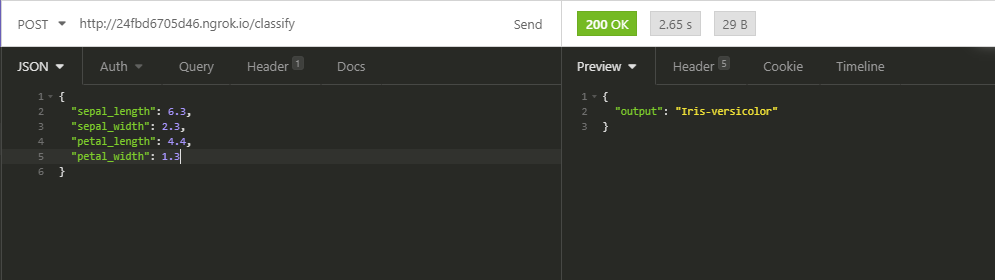

In [53]:
# melihat hasil prediksi tanpa web server dari data testing
result.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Hasil Prediksi
0,6.3,2.3,4.4,1.3,Iris-versicolor
1,6.4,2.7,5.3,1.9,Iris-virginica
2,5.4,3.7,1.5,0.2,Iris-setosa
3,6.1,3.0,4.6,1.4,Iris-versicolor
4,5.0,3.3,1.4,0.2,Iris-setosa


- Dilihat dari hasil prediksi melalui web service atau app Imsomnia, hasil prediksinya sudah tepat dapat dilihat dari hasil prediksi data testing pada tabel **result** diatas.
- Berarti model ML sudah dapat diteraplkan untuk data real, namun terlebih dahulu harus dilakukan scalling yang sama dengan data training agar mendapatkan prediksi yang terbaik.